In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# importing more libraries, particular to modeling
# from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [2]:
# display full result 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
train_org = pd.read_csv('uconn_comp_2018_train.csv')
test_org = pd.read_csv('uconn_comp_2018_test.csv')

pd.set_option('display.max_columns',None) # display all columns
train_org.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,85,38301,1,1,Rent,80006,12/16/2016,Friday,Local,1,0.0,74,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,75,30445,0,1,Rent,15021,2/12/2015,Thursday,Highway,1,1.0,79,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,4,49,F,0.0,87,38923,0,1,Own,20158,12/6/2016,Tuesday,Local,0,0.0,0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,5,58,F,1.0,58,40605,1,0,Own,15024,5/5/2016,Thursday,Local,3,0.0,99,Broker,1,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,6,38,M,1.0,95,36380,1,0,Rent,50034,10/27/2015,Tuesday,Highway,0,1.0,7,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


In [4]:
train_org.shape
test_org.shape
train_org.columns

(17998, 25)

(12002, 24)

Index(['claim_number', 'age_of_driver', 'gender', 'marital_status',
       'safty_rating', 'annual_income', 'high_education_ind',
       'address_change_ind', 'living_status', 'zip_code', 'claim_date',
       'claim_day_of_week', 'accident_site', 'past_num_of_claims',
       'witness_present_ind', 'liab_prct', 'channel',
       'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle',
       'vehicle_category', 'vehicle_price', 'vehicle_color', 'vehicle_weight',
       'fraud'],
      dtype='object')

In [5]:
train_org.isnull().sum()
test_org.isnull().sum()

claim_number                 0
age_of_driver                0
gender                       0
marital_status               5
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        132
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            17
age_of_vehicle               8
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64

claim_number                0
age_of_driver               0
gender                      0
marital_status              2
safty_rating                0
annual_income               0
high_education_ind          0
address_change_ind          0
living_status               0
zip_code                    0
claim_date                  0
claim_day_of_week           0
accident_site               0
past_num_of_claims          0
witness_present_ind        88
liab_prct                   0
channel                     0
policy_report_filed_ind     0
claim_est_payout           14
age_of_vehicle              3
vehicle_category            0
vehicle_price               0
vehicle_color               0
vehicle_weight              0
dtype: int64

### create working copy

In [6]:
train = train_org.copy(deep=True)
test = test_org.copy(deep=True)

## Exploratory Data Analysis

In [7]:
# overview of train data
train.describe()
# fraud has value of -1, we need delete it later

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
count,17998.000000,17998.000000,17993.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17866.000000,17998.000000,17998.000000,17981.000000,17990.000000,17998.000000,17998.000000,17998.000000
mean,14970.601622,43.695466,0.712722,73.562951,37367.655684,0.699189,0.577286,49875.595955,0.505001,0.232677,49.423269,0.600678,4975.792083,5.008060,23089.123114,23031.322385,0.156295
std,8659.940765,11.959819,0.452505,15.346807,2957.297249,0.458623,0.494004,29214.655149,0.955504,0.422550,33.678470,0.489773,2215.706510,2.258391,11988.429767,12052.385584,0.363604
min,1.000000,18.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.639432,0.000000,2457.329316,2429.429302,-1.000000
25%,7479.250000,35.000000,0.000000,65.000000,35554.000000,0.000000,0.000000,20111.000000,0.000000,0.000000,17.000000,0.000000,3337.029436,3.000000,14279.574850,14164.122133,0.000000
50%,14965.500000,43.000000,1.000000,76.000000,37610.000000,1.000000,1.000000,50028.000000,0.000000,0.000000,50.000000,1.000000,4668.796318,5.000000,20948.879250,20838.150260,0.000000
75%,22467.750000,51.000000,1.000000,85.000000,39318.000000,1.000000,1.000000,80038.000000,1.000000,0.000000,81.000000,1.000000,6255.901066,6.000000,29562.232780,29430.446292,0.000000
max,30000.000000,229.000000,1.000000,100.000000,54333.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,17218.345010,16.000000,127063.506000,123016.650400,1.000000


In [8]:
# overview of object data
train.describe(include=['O'])

,gender,living_status,claim_date,claim_day_of_week,accident_site,channel,vehicle_category,vehicle_color
count,17998,17998,17998,17998,17998,17998,17998,17998
unique,2,2,731,7,3,3,3,7
top,M,Own,9/14/2016,Saturday,Local,Broker,Compact,black
freq,9414,9969,39,2630,8768,9633,6063,2620


In [9]:
# overview of test data
test.describe()
test.describe(include=['O'])

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight
count,12002.000000,12002.000000,12000.000000,12002.000000,12002.000000,12002.000000,12002.000000,12002.000000,12002.000000,11914.000000,12002.000000,12002.000000,11988.000000,11999.000000,12002.000000,12002.000000
mean,15045.335111,43.525162,0.715167,73.702966,37331.504833,0.698134,0.576737,49762.387269,0.494918,0.238711,49.770122,0.601066,5016.502211,4.969331,22925.335594,22860.701764
std,8661.251912,12.201298,0.451354,15.378967,2926.069309,0.459087,0.494097,29133.180765,0.956002,0.426313,33.581191,0.489699,2257.041870,2.227267,12108.888412,12198.142508
min,2.000000,19.000000,0.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,471.363743,0.000000,2261.507903,2583.428985
25%,7532.250000,35.000000,0.000000,66.000000,35550.000000,0.000000,0.000000,20111.000000,0.000000,0.000000,18.000000,0.000000,3367.182392,3.000000,14087.559950,13832.434587
50%,15055.500000,43.000000,1.000000,76.000000,37606.000000,1.000000,1.000000,50027.000000,0.000000,0.000000,50.000000,1.000000,4673.058955,5.000000,20642.029325,20508.293695
75%,22559.500000,51.000000,1.000000,85.000000,39313.000000,1.000000,1.000000,80036.750000,1.000000,0.000000,82.000000,1.000000,6295.292309,6.000000,29293.641235,29205.553660
max,29998.000000,278.000000,1.000000,100.000000,56275.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,23903.366250,14.000000,106991.684500,101818.964200


,gender,living_status,claim_date,claim_day_of_week,accident_site,channel,vehicle_category,vehicle_color
count,12002,12002,12002,12002,12002,12002,12002,12002
unique,2,2,731,7,3,3,3,7
top,M,Own,5/10/2016,Monday,Local,Broker,Compact,red
freq,6216,6639,33,1746,5933,6370,4033,1766


In [10]:
# drop -1 in fraud
train = train.loc[train['fraud'] != -1]

### age_of_driver

In [11]:
# we have outliers in age
train.age_of_driver.dtype
# mean age of driver
train.age_of_driver.mean()
test.age_of_driver.mean()
# median age of driver
train.age_of_driver.median()
test.age_of_driver.median()

dtype('int64')

43.696193387051956

43.52516247292118

43.0

43.0

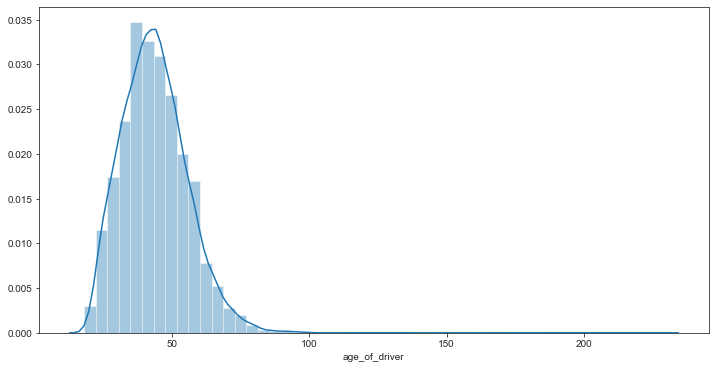

In [12]:
sns.set_style('ticks')
fig, ax = plt.subplots(figsize=(12, 6))
# fig, ax = plt.subplots()
# fig.set_size_inches(24,6)
sns.distplot(train.age_of_driver)

In [13]:
train.age_of_driver.max()
#  modifiy ages above 100 years as median 43
train.age_of_driver[train.age_of_driver > 100] = 43
test.age_of_driver[test.age_of_driver > 100] = 43

229

### gender

In [14]:
# distribution of gender
train.gender.value_counts()
train[['gender','fraud']].groupby(['gender'],as_index=False).mean()

M    9414
F    8581
Name: gender, dtype: int64

,gender,fraud
0,F,0.173873
1,M,0.140642


### marital_status - Marital Status of the Driver

In [15]:
train.marital_status.value_counts()
train[['marital_status','fraud']].groupby(['marital_status']).mean()

1.0    12821
0.0     5169
Name: marital_status, dtype: int64

,fraud
marital_status,
0.0,0.201393
1.0,0.138445


In [16]:
# impute missing value with 1
train.marital_status.fillna(train.marital_status.value_counts().index[0], inplace=True)
test.marital_status.fillna(test.marital_status.value_counts().index[0], inplace=True)

### safy_rating

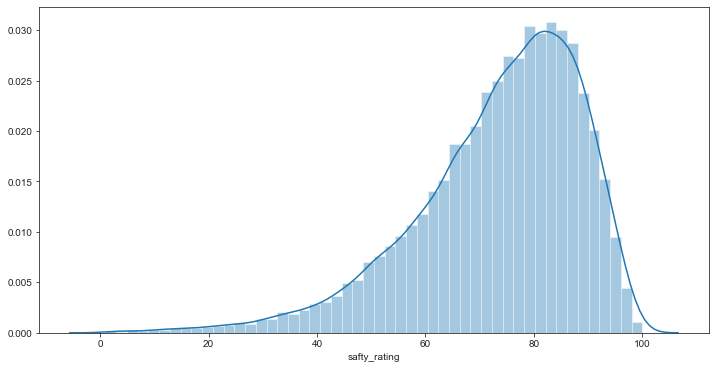

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.distplot(train.safty_rating)

### annual_income - Annual income of Driver

In [18]:
# impute median value for income where income is less than 0
train.annual_income[train.annual_income < 0] = 37610
test.annual_income[test.annual_income < 0] = 37610

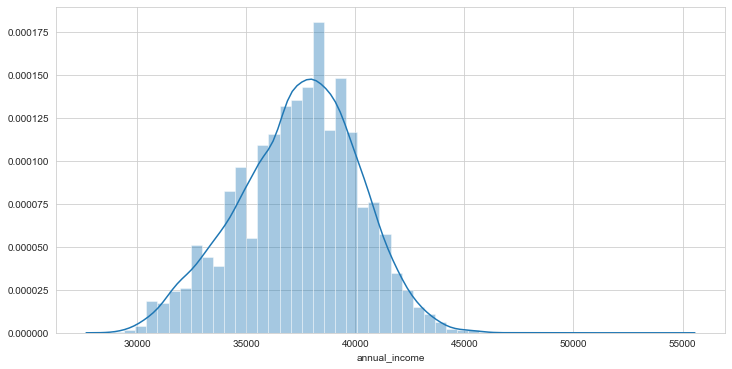

In [19]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.distplot(train.annual_income)

 ### high_education_ind - Driver’s high education index

In [20]:
train.high_education_ind.value_counts()
train[['high_education_ind','fraud']].groupby(['high_education_ind'],as_index=False).mean()

1    12583
0     5412
Name: high_education_ind, dtype: int64

,high_education_ind,fraud
0,0,0.211013
1,1,0.133037


### address_change_ind - Whether or not the driver changed living address in past 1 year

In [21]:
train.address_change_ind.value_counts()
train[['address_change_ind','fraud']].groupby(['address_change_ind'], as_index=False).mean()

1    10388
0     7607
Name: address_change_ind, dtype: int64

,address_change_ind,fraud
0,0,0.125805
1,1,0.178956


### living_status - Driver’s living status, own or rent

In [22]:
train.living_status.value_counts()
train[['living_status','fraud']].groupby(['living_status'],as_index=False).mean()

Own     9966
Rent    8029
Name: living_status, dtype: int64

,living_status,fraud
0,Own,0.147803
1,Rent,0.167269


### zipcode

In [23]:
# 查看有多少个unique zipcode
len(train.zip_code.unique())
len(test.zip_code.value_counts())

276

276

### claim_date

In [24]:
# extracting claim_date month
train['claim_date_formatted'] = pd.to_datetime(train['claim_date'], format = "%m/%d/%Y")
train['claim_month'] = train['claim_date_formatted'].dt.month

In [25]:
train['claim_month'].value_counts()
train[['claim_month','fraud']].groupby(['claim_month'],as_index=False).mean()

8     1627
3     1583
1     1579
7     1541
5     1526
12    1468
10    1464
9     1464
6     1455
11    1441
2     1424
4     1423
Name: claim_month, dtype: int64

,claim_month,fraud
0,1,0.153895
1,2,0.154494
2,3,0.144662
3,4,0.168658
4,5,0.158585
5,6,0.151890
6,7,0.151849
7,8,0.167179
8,9,0.145492
9,10,0.159153


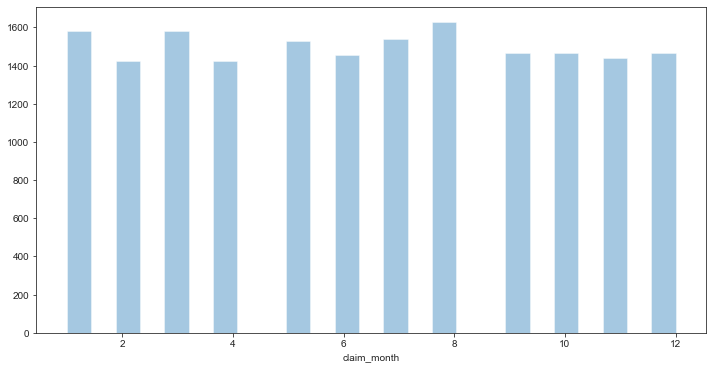

In [26]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.distplot(train.claim_month, kde = False)

In [27]:
test['claim_date_formatted'] = pd.to_datetime(test['claim_date'], format = "%m/%d/%Y")
test['claim_month'] = test['claim_date_formatted'].dt.month

# sns.set_style('ticks')
# fig, ax = plt.subplots()
# fig.set_size_inches(12,6)
# sns.distplot(test.claim_month, kde = False)

### claim_day_of_week - Day of week of first notice of claim

In [28]:
train.claim_day_of_week.value_counts()
train[['claim_day_of_week','fraud']].groupby(['claim_day_of_week'],as_index=False).mean()

Sunday       2629
Saturday     2629
Thursday     2570
Monday       2569
Friday       2554
Tuesday      2530
Wednesday    2514
Name: claim_day_of_week, dtype: int64

,claim_day_of_week,fraud
0,Friday,0.145654
1,Monday,0.160763
2,Saturday,0.149106
3,Sunday,0.155953
4,Thursday,0.145136
5,Tuesday,0.172727
6,Wednesday,0.166667


### accident_site - Accident location, highway, parking lot or local

In [29]:
train.accident_site.value_counts()
train[['accident_site','fraud']].groupby(['accident_site'],as_index=False).mean()

Local          8766
Parking Lot    5472
Highway        3757
Name: accident_site, dtype: int64

,accident_site,fraud
0,Highway,0.205749
1,Local,0.172256
2,Parking Lot,0.097405


### past_num_of_claims - Number of claims the driver reported in past 5 years

In [30]:
train.past_num_of_claims.value_counts()
train[['past_num_of_claims','fraud']].groupby(['past_num_of_claims'],as_index=False).mean().sort_values('past_num_of_claims')

0    12649
1     3074
2     1341
3      584
4      187
5      130
6       30
Name: past_num_of_claims, dtype: int64

,past_num_of_claims,fraud
0,0,0.135268
1,1,0.168510
2,2,0.229679
3,3,0.273973
4,4,0.288770
5,5,0.438462
6,6,0.266667


### witness_present_ind Witness indicator of the claim

In [31]:
train.witness_present_ind.value_counts()
train[['witness_present_ind','fraud']].groupby(['witness_present_ind'],as_index=False).mean()

0.0    13706
1.0     4157
Name: witness_present_ind, dtype: int64

,witness_present_ind,fraud
0,0.0,0.171604
1,1.0,0.107770


In [32]:
# fill the missing value with 0, majority class
train.witness_present_ind.fillna(0, inplace = True)
test.witness_present_ind.fillna(0, inplace = True)

### liab_prct - Liability percentage of the claim

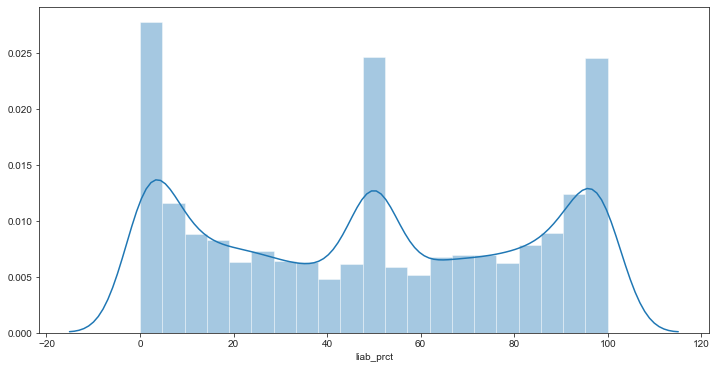

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.distplot(train.liab_prct)

### channel - The channel of policy purchasing

In [34]:
train.channel.value_counts()
train[['channel','fraud']].groupby(['channel'],as_index=False).mean()

Broker    9631
Phone     5771
Online    2593
Name: channel, dtype: int64

,channel,fraud
0,Broker,0.154813
1,Online,0.156575
2,Phone,0.159244


### policy_report_filed_ind - Policy report filed indicator

In [35]:
train.policy_report_filed_ind.value_counts()
train[['policy_report_filed_ind','fraud']].groupby(['policy_report_filed_ind'],as_index=False).mean()

1    10811
0     7184
Name: policy_report_filed_ind, dtype: int64

,policy_report_filed_ind,fraud
0,0,0.143096
1,1,0.165387


### claim_est_payout - Estimated claim payout

In [36]:
train.claim_est_payout.median()
test.claim_est_payout.median()

4668.3477885

4673.058955

In [37]:
# fill the missing value with median value
train.claim_est_payout.fillna(4669, inplace = True)
test.claim_est_payout.fillna(4573, inplace = True)

### age_of_vehicle - Age of first party vehicle

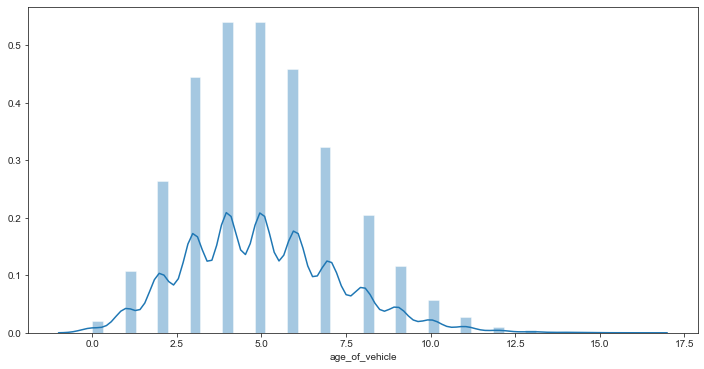

In [38]:
train.age_of_vehicle[train.age_of_vehicle.isnull()] = 5
test.age_of_vehicle[test.age_of_vehicle.isnull()] = 5

fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.distplot(train.age_of_vehicle)

### vehicle_category

In [39]:
train.vehicle_category.value_counts()
train[['vehicle_category','fraud']].groupby(['vehicle_category'],as_index=False).mean()

Compact    6062
Large      5984
Medium     5949
Name: vehicle_category, dtype: int64

,vehicle_category,fraud
0,Compact,0.160178
1,Large,0.148563
2,Medium,0.160699


### vehicle_color - Color of first party vehicle

In [41]:
train.vehicle_color.value_counts()
train[['vehicle_color','fraud']].groupby(['vehicle_color'],as_index=False).mean()

black     2619
silver    2617
white     2585
red       2565
blue      2548
gray      2546
other     2515
Name: vehicle_color, dtype: int64

,vehicle_color,fraud
0,black,0.163421
1,blue,0.153454
2,gray,0.154753
3,other,0.154274
4,red,0.157505
5,silver,0.160107
6,white,0.151644


## check null values

In [42]:
# verifing no missing values are remaining in train and test data
train.isnull().sum().sum()
np.sum(test.isnull()).sum()

0

0

In [43]:
train.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud,claim_date_formatted,claim_month
0,1,46,M,1.0,85,38301,1,1,Rent,80006,12/16/2016,Friday,Local,1,0.0,74,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0,2016-12-16,12
1,3,21,F,0.0,75,30445,0,1,Rent,15021,2/12/2015,Thursday,Highway,1,1.0,79,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0,2015-02-12,2
2,4,49,F,0.0,87,38923,0,1,Own,20158,12/6/2016,Tuesday,Local,0,0.0,0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1,2016-12-06,12
3,5,58,F,1.0,58,40605,1,0,Own,15024,5/5/2016,Thursday,Local,3,0.0,99,Broker,1,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1,2016-05-05,5
4,6,38,M,1.0,95,36380,1,0,Rent,50034,10/27/2015,Tuesday,Highway,0,1.0,7,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0,2015-10-27,10


In [44]:
removeCols = ['claim_number','zip_code','claim_date','claim_day_of_week','channel','vehicle_color',
              'claim_date_formatted','claim_month']

In [45]:
train = train.drop(removeCols, axis = 1)
test = test.drop(removeCols, axis = 1)

In [46]:
# train.head()

In [47]:
oneHotCols = ['gender','living_status','accident_site','vehicle_category']

In [48]:
enc = OneHotEncoder(handle_unknown='ignore')

In [49]:
enc_df = pd.DataFrame(enc.fit_transform(train[oneHotCols]).toarray())

In [50]:
train.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,accident_site,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_weight,fraud
0,46,M,1.0,85,38301,1,1,Rent,Local,1,0.0,74,0,7530.940993,9.0,Compact,12885.45235,16161.33381,0
1,21,F,0.0,75,30445,0,1,Rent,Highway,1,1.0,79,0,2966.024895,4.0,Large,29429.45218,28691.96422,0
2,49,F,0.0,87,38923,0,1,Own,Local,0,0.0,0,0,6283.888333,3.0,Compact,21701.18195,22090.94758,1
3,58,F,1.0,58,40605,1,0,Own,Local,3,0.0,99,1,6169.747994,4.0,Medium,13198.27344,38329.58106,1
4,38,M,1.0,95,36380,1,0,Rent,Highway,0,1.0,7,0,4541.387150,7.0,Medium,38060.21122,25876.56319,0


In [51]:
# enc_df.head()

In [52]:
enc_test = pd.DataFrame(enc.fit_transform(test[oneHotCols]).toarray())

In [53]:
# enc_test.head()

In [54]:
train = pd.concat([train, enc_df], join = "inner", axis=1)

In [55]:
test = pd.concat([test, enc_test], join = "inner", axis=1)

In [56]:
train = train.drop(oneHotCols, axis = 1)
test = test.drop(oneHotCols, axis = 1)

##  creating subsets of data to be used for modeling

In [57]:
train_x = train.drop('fraud', axis = 1)
train_y = train['fraud']
test_x = test

In [58]:
# train_x.head()

## Min-Max Scaler

In [59]:
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.fit_transform(test_x)

In [60]:
train_x = pd.DataFrame(train_x)
test_x = pd.DataFrame(test_x)

## Modeling

In [61]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.33, random_state=42)

## Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=0.1, solver='liblinear')

C_range = [0.01, 0.1, 1, 10, 100]
para_grid = dict(C=C_range)

lr_grid = GridSearchCV(lr, para_grid, scoring='roc_auc', cv = 10) #default cv is 5
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=0.1, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [63]:
print('best parameter: ', lr_grid.best_params_)
print('best score: ', lr_grid.best_score_)
print('Accurary of Logistic Regression on X_train: {:.3f}' .format(lr_grid.score(X_train, y_train)))
print('Accuracy of Logistic Regression on X_test: {:.3f}' .format(lr_grid.score(X_test, y_test)))

# scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='roc_auc')
# print("Accuracy: %0.3f (+/- %0.3f)" % (scores.mean(), scores.std() * 2))

best parameter:  {'C': 100}
best score:  0.6653620065755531
Accurary of Logistic Regression on X_train: 0.671
Accuracy of Logistic Regression on X_test: 0.670


### using accuracy as scoring

In [72]:
lr2 = LogisticRegression(solver='liblinear')

C_range = [0.01, 0.1, 1, 10, 100]
para_grid = dict(C=C_range)

lr2_grid = GridSearchCV(lr, para_grid, scoring='accuracy', cv = 10) #default cv is 5
lr2_grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=0.1, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None, param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [73]:
print('best parameter: ', lr2_grid.best_params_)
lr2_grid.best_score_
print('Accurary of Logistic Regression on X_train: {:.3f}' .format(lr2_grid.score(X_train, y_train)))
print('Accuracy of Logistic Regression on X_test: {:.3f}' .format(lr2_grid.score(X_test, y_test)))

best parameter:  {'C': 0.1}


0.8437862950058072

Accurary of Logistic Regression on X_train: 0.844
Accuracy of Logistic Regression on X_test: 0.845


## Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

grid_values = {'max_leaf_nodes': [35,55,75]} #
clf_dt = DecisionTreeClassifier(min_samples_split=0.085, max_features=15)
dt_grid = GridSearchCV(clf_dt, param_grid = grid_values, scoring = 'roc_auc', cv=5)
dt_grid.fit(X_train, y_train)

print('best parameter: ', dt_grid.best_params_)
print('best score):', dt_grid.best_score_)

print('Accurary of Decision Tree Classifier on X_train: {:.3f}' .format(dt_grid.score(X_train, y_train)))
print('Accurary of Decision Tree Regression Classifier on X_text: {:.3f}' .format(dt_grid.score(X_test, y_test)))

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=15,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=0.085,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [35, 55, 75]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,


best parameter:  {'max_leaf_nodes': 35}
best score): 0.6417691099580076
Accurary of Decision Tree Classifier on X_train: 0.679
Accurary of Decision Tree Regression Classifier on X_text: 0.640


### using accuracy

In [76]:
from sklearn.tree import DecisionTreeClassifier

grid_values = {'max_leaf_nodes': [35,55,75]} #
clf_dt2 = DecisionTreeClassifier(min_samples_split=0.085, max_features=15)
dt2_grid = GridSearchCV(clf_dt2, param_grid = grid_values, scoring = 'accuracy', cv=10)
dt2_grid.fit(X_train, y_train)

print('best parameter: ', dt2_grid.best_params_)
print('best score):', dt2_grid.best_score_)

print('Accurary of Decision Tree Classifier on X_train: {:.3f}' .format(dt2_grid.score(X_train, y_train)))
print('Accurary of Decision Tree Regression Classifier on X_text: {:.3f}' .format(dt2_grid.score(X_test, y_test)))

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=15,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=0.085,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': [35, 55, 75]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,

best parameter:  {'max_leaf_nodes': 55}
best score): 0.8417122946739671
Accurary of Decision Tree Classifier on X_train: 0.844
Accurary of Decision Tree Regression Classifier on X_text: 0.843


## Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_features=16, max_depth=6)
n_estimators = range(200,2200,200)
para_grid = dict(n_estimators=n_estimators)

rf_grid = GridSearchCV(rfc, para_grid, cv=10, scoring='roc_auc',n_jobs=-1)

rf_grid.fit(X_train, y_train)

print('Accurary of Random Forest Classifier on X_train: {:.3f}' .format(rf_grid.score(X_train, y_train)))
print('Accurary of Random Forest Classifier on X_test: {:.3f}' .format(rf_grid.score(X_test, y_test)))
print(rf_grid.best_params_)
print(rf_grid.best_score_)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=6,
                                              max_features=16,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='warn

Accurary of Random Forest Classifier on X_train: 0.740
Accurary of Random Forest Classifier on X_test: 0.667
{'n_estimators': 200}
0.6642798046615532


### using accuracy

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc2 = RandomForestClassifier(max_features=16, max_depth=6)
n_estimators = range(200,2200,200)
para_grid = dict(n_estimators=n_estimators)

rf2_grid = GridSearchCV(rfc2, para_grid, cv=10, scoring='accuracy',n_jobs=-1)

rf2_grid.fit(X_train, y_train)

print('Accurary of Random Forest Classifier on X_train: {:.3f}' .format(rf2_grid.score(X_train, y_train)))
print('Accurary of Random Forest Classifier on X_test: {:.3f}' .format(rf2_grid.score(X_test, y_test)))
print(rf2_grid.best_params_)
print(rf2_grid.best_score_)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=6,
                                              max_features=16,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='warn

Accurary of Random Forest Classifier on X_train: 0.845
Accurary of Random Forest Classifier on X_test: 0.846
{'n_estimators': 400}
0.842790774846524


## Gradient Boosting Decision Tree

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

grid_values = {'learning_rate': [0.01,0.1,1,10], 'min_samples_leaf': [10,20,30]}
xgb_clf = GradientBoostingClassifier(n_estimators = 440, random_state=9)

xgb_grid = GridSearchCV(xgb_clf, param_grid = grid_values, scoring = 'roc_auc', cv=10)
xgb_grid.fit(X_train, y_train)
print('Accurary of Gradient Boosting Classifier on X_train: {:.3f}' .format(xgb_grid.score(X_train, y_train)))
print('Accurary of Gradient Boosting Tree Regression Classifier on X_test: {:.3f}' .format(xgb_grid.score(X_test, y_test)))

print('Grid best parameter: ', xgb_grid.best_params_)
print('Grid best score:', xgb_grid.best_score_)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=440,
                                                  n_iter_no_change=None,
                                                  presort

Accurary of Gradient Boosting Classifier on X_train: 0.721
Accurary of Gradient Boosting Tree Regression Classifier on X_test: 0.682
Grid best parameter:  {'learning_rate': 0.01, 'min_samples_leaf': 30}
Grid best score: 0.6779540972617566


### using accuracy

In [81]:
from sklearn.ensemble import GradientBoostingClassifier

grid_values = {'learning_rate': [0.01,0.1,1,10], 'min_samples_leaf': [10,20,30]}
xgb_clf2 = GradientBoostingClassifier(n_estimators = 440, random_state=9)

xgb2_grid = GridSearchCV(xgb_clf2, param_grid = grid_values, scoring = 'accuracy', cv=10)
xgb2_grid.fit(X_train, y_train)
print('Accurary of Gradient Boosting Classifier on X_train: {:.3f}' .format(xgb2_grid.score(X_train, y_train)))
print('Accurary of Gradient Boosting Tree Regression Classifier on X_test: {:.3f}' .format(xgb2_grid.score(X_test, y_test)))

print('Grid best parameter: ', xgb2_grid.best_params_)
print('Grid best score:', xgb2_grid.best_score_)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=440,
                                                  n_iter_no_change=None,
                                                  presort

Accurary of Gradient Boosting Classifier on X_train: 0.845
Accurary of Gradient Boosting Tree Regression Classifier on X_test: 0.845
Grid best parameter:  {'learning_rate': 0.01, 'min_samples_leaf': 10}
Grid best score: 0.8434544549527128


## SVC

In [69]:
from sklearn.svm import SVC
svc_clf = SVC(kernel = 'rbf')

grid_values = {'gamma': [0.001, 0.01, 1], 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

svc_grid = GridSearchCV(svc_clf, param_grid = grid_values, cv=10, scoring='roc_auc')
svc_grid.fit(X_train, y_train)

print('Accurary of Support Vector Classifier on X_train: {:.3f}' .format(svc_grid.score(X_train, y_train)))
print('Accurary of Support Vector Classifier on X_test: {:.3f}' .format(svc_grid.score(X_test, y_test)))

print('best parameter: ', svc_grid.best_params_)
print('best score:', svc_grid.best_score_)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

Accurary of Support Vector Classifier on X_train: 0.685
Accurary of Support Vector Classifier on X_test: 0.644
best parameter:  {'C': 1000, 'gamma': 0.001}
best score: 0.6382708072649464


In [84]:
from sklearn.svm import SVC
svc_clf2 = SVC(kernel = 'rbf')

grid_values = {'gamma': [0.001, 0.01], 'C':[0.01, 0.1, 1, 10, 100, 1000]}

svc2_grid = GridSearchCV(svc_clf2, param_grid = grid_values, cv=10, scoring='accuracy')
svc2_grid.fit(X_train, y_train)

print('Accurary of Support Vector Classifier on X_train: {:.3f}' .format(svc2_grid.score(X_train, y_train)))
print('Accurary of Support Vector Classifier on X_test: {:.3f}' .format(svc2_grid.score(X_test, y_test)))

print('best parameter: ', svc2_grid.best_params_)
print('best score:', svc2_grid.best_score_)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Accurary of Support Vector Classifier on X_train: 0.843
Accurary of Support Vector Classifier on X_test: 0.845
best parameter:  {'C': 0.01, 'gamma': 0.001}
best score: 0.8429566948730712


## Neural Network

In [70]:
from sklearn.neural_network import MLPClassifier

nn_clf = MLPClassifier(solver='adam', alpha = 0.3, random_state = 0)
grid_values = {'activation': ['relu', 'logistic', 'tanh']}

nn_grid = GridSearchCV(nn_clf, param_grid = grid_values, scoring = 'roc_auc', cv=10)

nn_grid.fit(X_train, y_train)
print('Accurary of Neural Network on X_train: {:.3f}' .format(nn_grid.score(X_train, y_train)))
print('Accurary of Neural Network on X_test: {:.3f}' .format(nn_grid.score(X_test, y_test)))

print('Grid best parameter: ', nn_grid.best_params_)
print('Grid best score:', nn_grid.best_score_)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.3,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=0, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['relu', 'logistic', 'tanh']},
 

Accurary of Neural Network on X_train: 0.664
Accurary of Neural Network on X_test: 0.663
Grid best parameter:  {'activation': 'tanh'}
Grid best score: 0.6593890123394088


### using accuracy

In [80]:
from sklearn.neural_network import MLPClassifier

nn_clf2 = MLPClassifier(solver='adam', alpha = 0.3, random_state = 0)
grid_values = {'activation': ['relu', 'logistic', 'tanh']}

nn2_grid = GridSearchCV(nn_clf2, param_grid = grid_values, scoring = 'accuracy', cv=10)

nn2_grid.fit(X_train, y_train)
print('Accurary of Neural Network on X_train: {:.3f}' .format(nn2_grid.score(X_train, y_train)))
print('Accurary of Neural Network on X_test: {:.3f}' .format(nn2_grid.score(X_test, y_test)))

print('Grid best parameter: ', nn2_grid.best_params_)
print('Grid best score:', nn2_grid.best_score_)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.3,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=0, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['relu', 'logistic', 'tanh']},
 

Accurary of Neural Network on X_train: 0.843
Accurary of Neural Network on X_test: 0.845
Grid best parameter:  {'activation': 'tanh'}
Grid best score: 0.8437862950058072


In [86]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC',
              'Gradient Boosting Decision Trees','Neural Network'],
    'Score': [lr2_grid.best_score_, dt2_grid.best_score_, rf2_grid.best_score_, svc2_grid.best_score_,
              xgb2_grid.best_score_, nn2_grid.best_score_]})
#               svc2_grid.best_score_, 
models.sort_values(by='Score', ascending=False)


,Model,Score
0,Logistic Regression,0.843786
5,Neural Network,0.843786
4,Gradient Boosting Decision Trees,0.843454
3,SVC,0.842957
2,Random Forest,0.842791
1,Decision Tree,0.841712
